<a href="https://colab.research.google.com/github/Cooper2112/SQC/blob/main/SQCHW13b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 13.19

In [2]:
import math
import random
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC13.19.csv', sep=',')

data2

,PouringTemperature,TitaniumContent,HeatTreatment,GrainRefiner,I,II
0,-1,-1,-1,-1,7.037,6.376
1,1,-1,-1,-1,14.707,15.219
2,-1,1,-1,-1,11.635,12.089
3,1,1,-1,-1,17.273,17.815
4,-1,-1,1,-1,10.403,10.151
5,1,-1,1,-1,4.368,4.098
6,-1,1,1,-1,9.360,9.253
7,1,1,1,-1,13.440,12.923
8,-1,-1,-1,1,8.561,8.951
9,1,-1,-1,1,16.867,17.052


## ANOVA Tables

In [5]:
model = ols('I ~ C(PouringTemperature) + C(TitaniumContent) + C(PouringTemperature):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),37.054613,1.0,2.773952,0.121679
C(TitaniumContent),65.355098,1.0,4.892560,0.047118
C(PouringTemperature):C(TitaniumContent),15.818518,1.0,1.184193,0.297877
Residual,160.296687,12.0,NaN,NaN


In [6]:
model = ols('I ~ C(PouringTemperature) + C(HeatTreatment) + C(PouringTemperature):C(HeatTreatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),37.054613,1.0,3.284713,0.095006
C(HeatTreatment),46.905377,1.0,4.157936,0.064092
C(PouringTemperature):C(HeatTreatment),59.193789,1.0,5.247245,0.040881
Residual,135.371137,12.0,NaN,NaN


In [7]:
model = ols('I ~ C(PouringTemperature) + C(GrainRefiner) + C(PouringTemperature):C(GrainRefiner)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),37.054613,1.0,1.968733,0.185924
C(GrainRefiner),15.442935,1.0,0.820492,0.382864
C(PouringTemperature):C(GrainRefiner),0.168716,1.0,0.008964,0.926133
Residual,225.858652,12.0,NaN,NaN


In [8]:
model = ols('I ~ C(HeatTreatment) + C(TitaniumContent) + C(HeatTreatment):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(HeatTreatment),46.905377,1.0,3.388091,0.090517
C(TitaniumContent),65.355098,1.0,4.720759,0.050547
C(HeatTreatment):C(TitaniumContent),0.134139,1.0,0.009689,0.923213
Residual,166.130302,12.0,NaN,NaN


In [9]:
model = ols('I ~ C(GrainRefiner) + C(TitaniumContent) + C(GrainRefiner):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GrainRefiner),15.442935,1.0,0.938357,0.35182
C(TitaniumContent),65.355098,1.0,3.971164,0.06953
C(GrainRefiner):C(TitaniumContent),0.237900,1.0,0.014455,0.90629
Residual,197.488982,12.0,NaN,NaN


In [10]:
model = ols('I ~ C(GrainRefiner) + C(HeatTreatment) + C(GrainRefiner):C(HeatTreatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GrainRefiner),15.442935,1.0,0.857617,0.372657
C(HeatTreatment),46.905377,1.0,2.604870,0.132507
C(GrainRefiner):C(HeatTreatment),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [11]:
model = ols('II ~ C(PouringTemperature) + C(TitaniumContent) + C(PouringTemperature):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),35.859138,1.0,2.356911,0.150665
C(TitaniumContent),61.140671,1.0,4.018589,0.068098
C(PouringTemperature):C(TitaniumContent),14.131961,1.0,0.928850,0.354182
Residual,182.573565,12.0,NaN,NaN


In [12]:
model = ols('II ~ C(PouringTemperature) + C(HeatTreatment) + C(PouringTemperature):C(HeatTreatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),35.859138,1.0,3.271287,0.095609
C(HeatTreatment),56.795064,1.0,5.181189,0.041964
C(PouringTemperature):C(HeatTreatment),69.509738,1.0,6.341098,0.027001
Residual,131.541395,12.0,NaN,NaN


In [13]:
model = ols('II ~ C(PouringTemperature) + C(GrainRefiner) + C(PouringTemperature):C(GrainRefiner)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemperature),35.859138,1.0,1.773628,0.207677
C(GrainRefiner),15.219752,1.0,0.752784,0.402614
C(PouringTemperature):C(GrainRefiner),0.010973,1.0,0.000543,0.981797
Residual,242.615472,12.0,NaN,NaN


In [14]:
model = ols('II ~ C(HeatTreatment) + C(TitaniumContent) + C(HeatTreatment):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(HeatTreatment),56.795064,1.0,3.877474,0.072468
C(TitaniumContent),61.140671,1.0,4.174154,0.063645
C(HeatTreatment):C(TitaniumContent),0.000315,1.0,0.000022,0.996376
Residual,175.769285,12.0,NaN,NaN


In [15]:
model = ols('II ~ C(GrainRefiner) + C(TitaniumContent) + C(GrainRefiner):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GrainRefiner),15.219752,1.0,0.840655,0.377268
C(TitaniumContent),61.140671,1.0,3.377072,0.090983
C(GrainRefiner):C(TitaniumContent),0.089252,1.0,0.004930,0.945181
Residual,217.255661,12.0,NaN,NaN


In [16]:
model = ols('II ~ C(GrainRefiner) + C(HeatTreatment) + C(GrainRefiner):C(HeatTreatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GrainRefiner),1.521975e+01,1.0,8.238378e-01,0.381927
C(HeatTreatment),5.679506e+01,1.0,3.074289e+00,0.105021
C(GrainRefiner):C(HeatTreatment),5.625000e-07,1.0,3.044785e-08,0.999864
Residual,2.216905e+02,12.0,NaN,NaN


## Replicate II Residuals

In [ ]:
import statsmodels.api as sm

y = data2['II']

x = data2[['A', 'B', 'C', 'D']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     II   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     3.728
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0374
Time:                        20:47:20   Log-Likelihood:                -39.129
No. Observations:                  16   AIC:                             88.26
Df Residuals:                      11   BIC:                             92.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9658      0.842     14.216      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



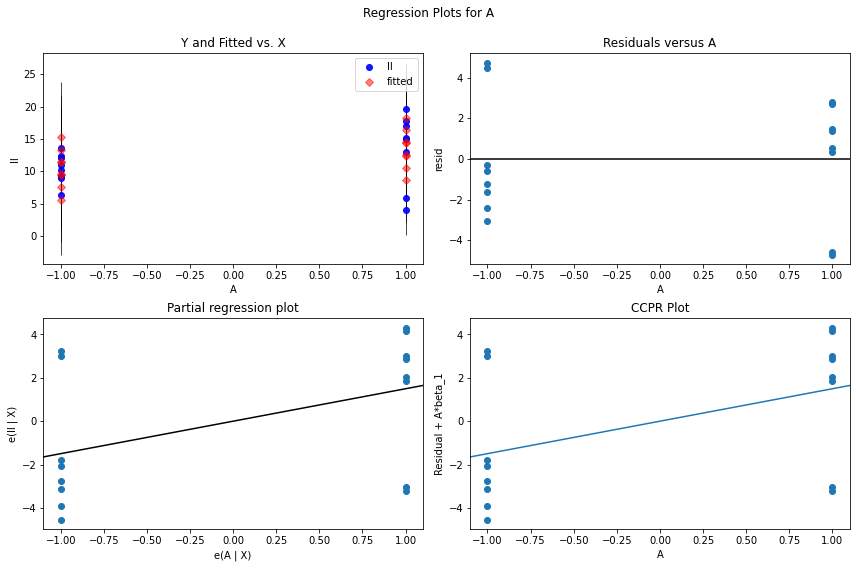

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'A', fig=fig)

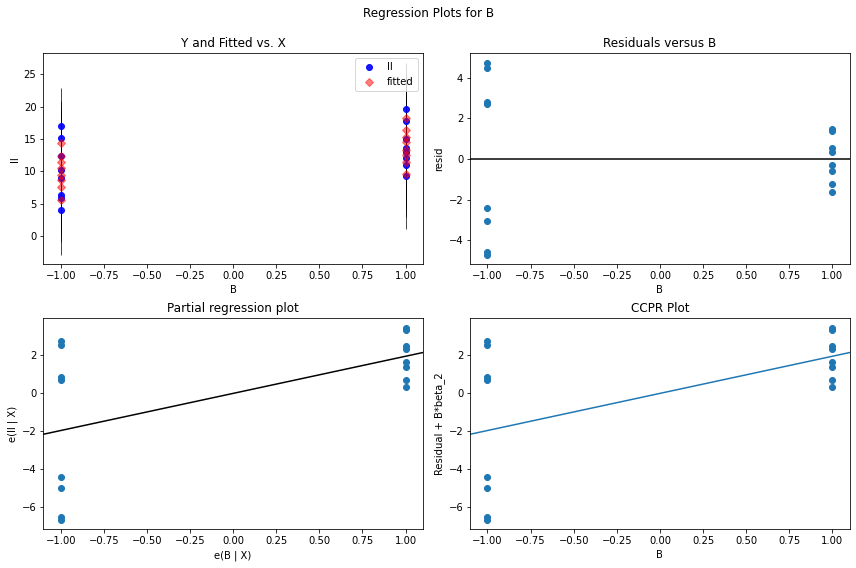

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'B', fig=fig)

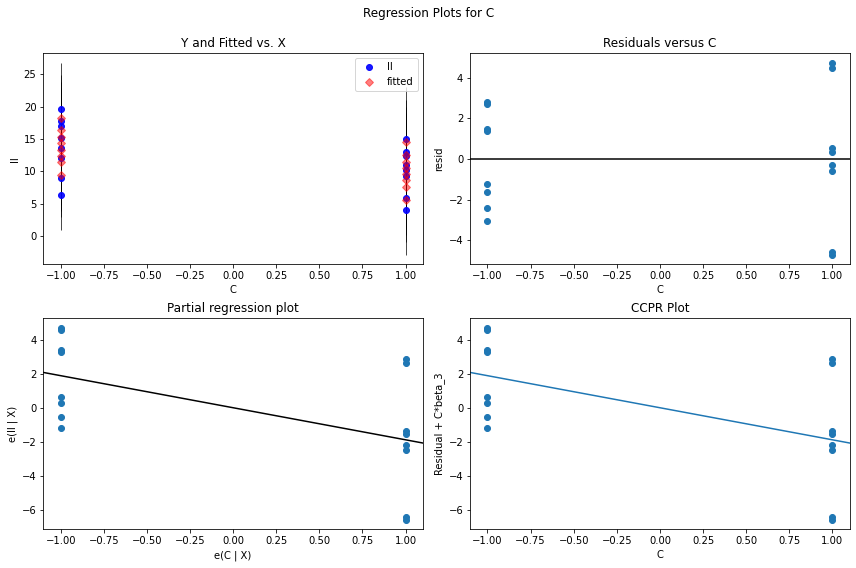

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'C', fig=fig)

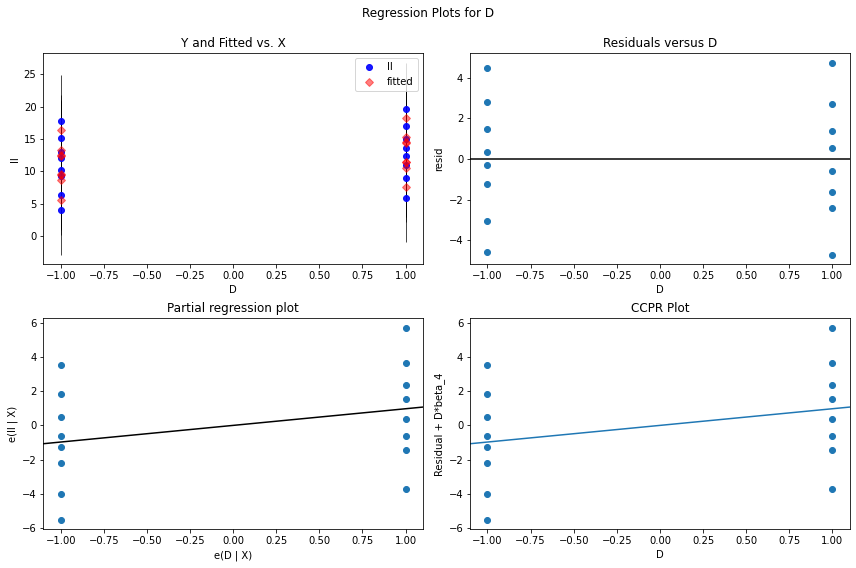

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'D', fig=fig)

## Replicate I Residuals

In [ ]:
import statsmodels.api as sm

y = data2['I']

x = data2[['A', 'B', 'C', 'D']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     3.983
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0309
Time:                        20:48:38   Log-Likelihood:                -38.396
No. Observations:                  16   AIC:                             86.79
Df Residuals:                      11   BIC:                             90.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0103      0.804     14.938      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



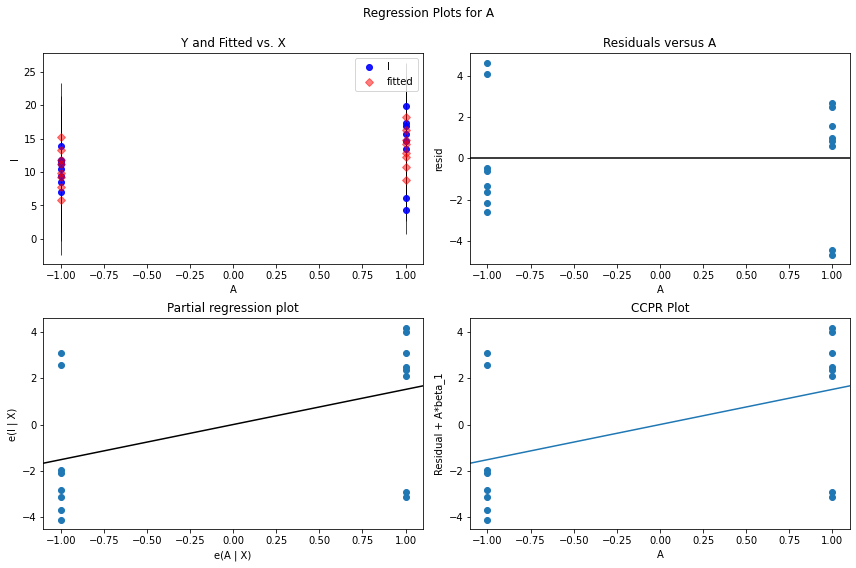

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'A', fig=fig)

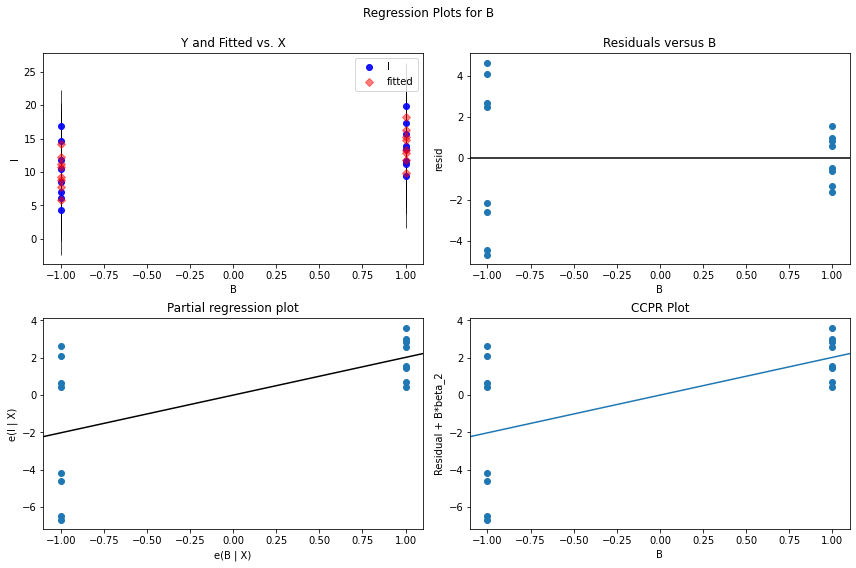

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'B', fig=fig)

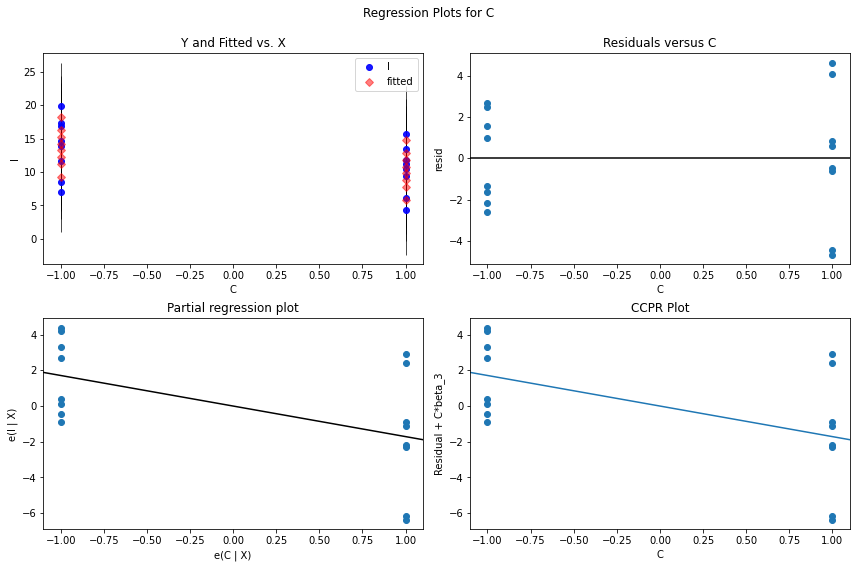

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'C', fig=fig)

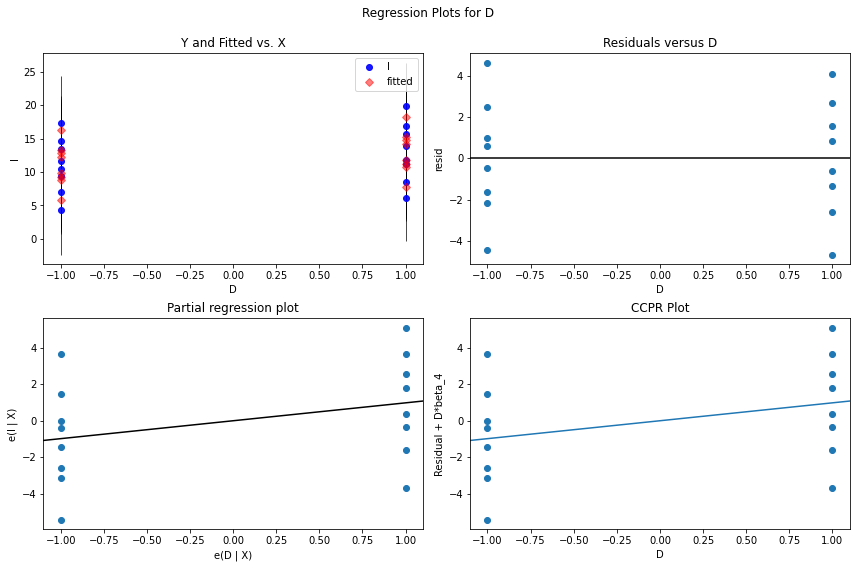

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'D', fig=fig)

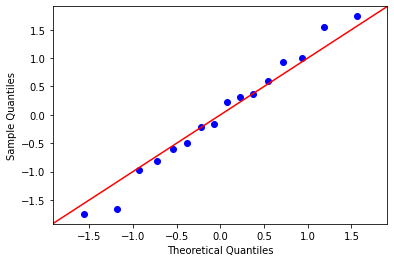

In [ ]:
res = model.resid


fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

## 13.20

## Contour Plots

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data2[['A','B']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AB vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='A',
                    yaxis_title='B',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data2[['A','D']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='A',
                    yaxis_title='D',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data2[['D','B']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='BD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='B',
                    yaxis_title='D',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
model = ols('I ~ II', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
II,276.227545,1.0,1683.309501,5.460964e-16
Residual,2.297371,14.0,NaN,NaN


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1683.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           5.46e-16
Time:                        20:39:05   Log-Likelihood:                -7.1764
No. Observations:                  16   AIC:                             18.35
Df Residuals:                      14   BIC:                             19.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4060      0.300      1.351      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [ ]:
X=data2[['A', 'B', 'C', 'D']]
X

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [ ]:
Y=data2[['II']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 9.4226875],
       [12.4168125],
       [13.3323125],
       [16.3264375],
       [ 5.6545625],
       [ 8.6486875],
       [ 9.5641875],
       [12.5583125],
       [11.3733125],
       [14.3674375],
       [15.2829375],
       [18.2770625],
       [ 7.6051875],
       [10.5993125],
       [11.5148125],
       [14.5089375]])

## 3D Plots

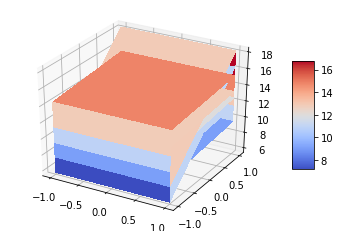

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x2=data2['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

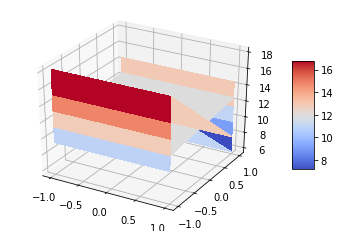

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x2=data2['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

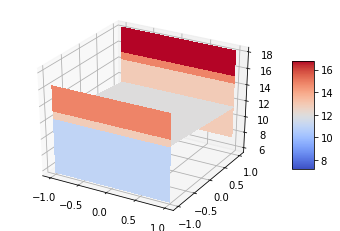

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['A']
x2=data2['D']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

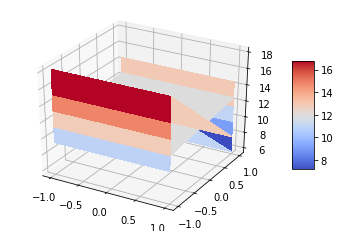

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['B']
x2=data2['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

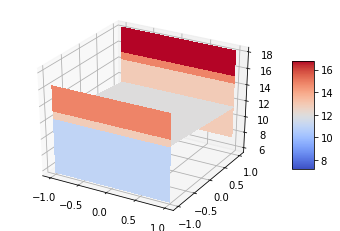

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['B']
x2=data2['D']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

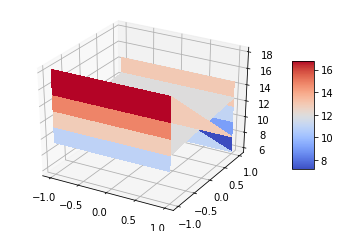

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['D']
x2=data2['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

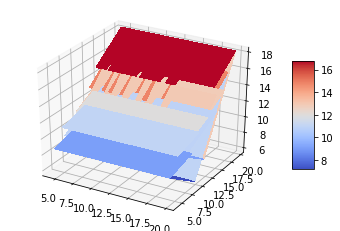

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data2['I']
x2=data2['II']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
data2.head()

,A,B,C,D,I,II
0,-1,-1,-1,-1,7.037,6.376
1,1,-1,-1,-1,14.707,15.219
2,-1,1,-1,-1,11.635,12.089
3,1,1,-1,-1,17.273,17.815
4,-1,-1,1,-1,10.403,10.151
